<b><font size=6, color='#4ba3b4'> Plotting Soundings from the 2006 AMMA Field Campaign

Giselle Martinez</br>
Dec. 14, 2022</br>
AOS573

## Background

Today I will introduce Skew-T formatting and the use of real-world dropsonde data from a field campaign that took place in August 2006. The following notebook expands on a section of my ongoing research project, [CPEX-CV](https://espo.nasa.gov/cpex-cv/content/CPEX-CV) and introduces the [African Monsoon Multidisciplinary Analyses (AMMA)](https://www.eol.ucar.edu/field_projects/amma) field campaign from 2006. Because my research topic is so extensive, we thought to narrow our understanding of [African Westerly Waves (AEWs)](https://glossary.ametsoc.org/wiki/African_Easterly_Wave) and the (possible) influence on West African convective systems offshore.

### References

[Upper Air Soundings](https://unidata.github.io/MetPy/latest/tutorials/upperair_soundings.html#sphx-glr-tutorials-upperair-soundings-py)</br>
[Advanced Soundings](https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding.html#sphx-glr-examples-advanced-sounding-py)</br>
[Metpy Mondays](https://www.unidata.ucar.edu/blogs/news/entry/metpy-mondays) (Some of their videos have been very helpful!)

### Article References

These are the main research papers if you are curious to look into the topic even further, we'll look into their results and compared if it comes closer to answering our question if AEWs influence convective systems offshore the West African coast.

[Characteristics of an African Easterly Wave Observed during NAMMA (Cifelli et al. 2010)](https://journals.ametsoc.org/view/journals/atsc/67/1/2009jas3141.1.xml?viewAnnotation=177)</br>
[Characteristics of convection during AMMA/NAMMA (Guy et al. 2011)](https://rmets.onlinelibrary.wiley.com/doi/epdf/10.1002/qj.839)</br>
[Radar Observations of Convective System Variability in Relationship to African Easterly Waves during the 2006 AMMA Special Observing Period (Nieto et al. 2009)](https://journals.ametsoc.org/view/journals/mwre/137/12/2009mwr2740.1.xml#i1520-0493-137-12-4136-Fink1)</br>
[African Easterly Wave Variability and Its Relationship to Atlantic Tropical Cyclone Activity (Thorncroft and Hodges (2001))](https://journals.ametsoc.org/view/journals/clim/14/6/1520-0442_2001_014_1166_aewvai_2.0.co_2.xml)

Import the packages we need:

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import metpy as metpy 
import metpy.calc as mpcalc
from metpy.units import units
import metpy.plots as mplot
from metpy.plots import SkewT

---

### Background on African Easterly Waves (AEWs) and the West African Monsoon Season

West Africa is known to receive an abundance of rainfall over the summer season; mainly by mesoscale convective systems (MCSs) that evolve over land and (in some instances) maintain its strength offshore. The West African monsoon season begins in <b> mid-May to October, peaking in July to August. </b>

Some research journals define AEWs differently, for this notebook, we'll be using the definition given by [Thorncroft and Hodges (2001)](https://journals.ametsoc.org/view/journals/clim/14/6/1520-0442_2001_014_1166_aewvai_2.0.co_2.xml) that defined AEWs as <b> westward-propagating features of positive relative vorticity.</b>

><b><u><font>NOTE:</font></u></b>  [This MetED module introduces the AEJ and AEWs in detail](https://www.meted.ucar.edu/tropical/synoptic/Afr_E_Waves/print.php). This notebook will not be covering AEJs extensively, instead we'll focus on AEWs and CAPE values.

### A key characteristic of the interaction of the African Easterly Jet and African Easterly Waves

The African easterly jet (AEJ) is a year-round stream of easterly winds created by the temperature gradient between the Sahara and the West African coast.

The AEJ characterizes AEWs trough propogation north/south of the jet and found that West African convective systems were linked with the passage of AEWs through the jet, (Nieto et al. 2009, Guy et al. 2011). 

We'll look into this in one of the plots briefly.

### Introduction to AMMA

Field campaign that took place in Niamey, Niger in August 2006.
The objective of the AMMA field campaign was to provide a better understanding of the West African monsoon season, (Nieto et al. 2009) by tracking convective systems that progressed offshore.

Dataset used for Praia, Cape Verde retrieved by quality-controlled dropsonde data from [AMMA](https://data.eol.ucar.edu/dataset/500.002).

    Information of the variables in AMMA sounding data, for Praia, Cape Verde Islands. 

    p - pressure (mb)
    h - height or altitude (m)
    t - temperature (C)
    td - dew point temperature (C)
    dir - wind direction (degrees)
    spd - wind speed (m/s)
    xlat  - latitudinal position of balloon 
    xlon  - longitude position of balloon
    
    Start:
    STN     DATE   GMT   HTS     LAT     LONG    ID
    GVNP    060818 1707    85    14.93   -23.49  08596
    
    End:
    STN     DATE   GMT   HTS     LAT     LONG    ID
    GVNP    060914 1132    85    14.93   -23.49  08596

---

## Plotting West Africa

To illustrate what my dataset is telling us later in the notebook, I coded a plot using [Matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) of West Africa, including markers of Niamey, Niger (continetal site), Dakar, Senegal (coastal site), and Praia, Cape Verde Islands (oceanic site).

><b><u><font color='red'>NOTE:</font></u></b>  This took a couple of moments to load.

I also used [Cartopy built-in projections](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections) and narrowed the location of the west African coast using `set_extent`:

Text(-23.51, 14.93, 'Praia')

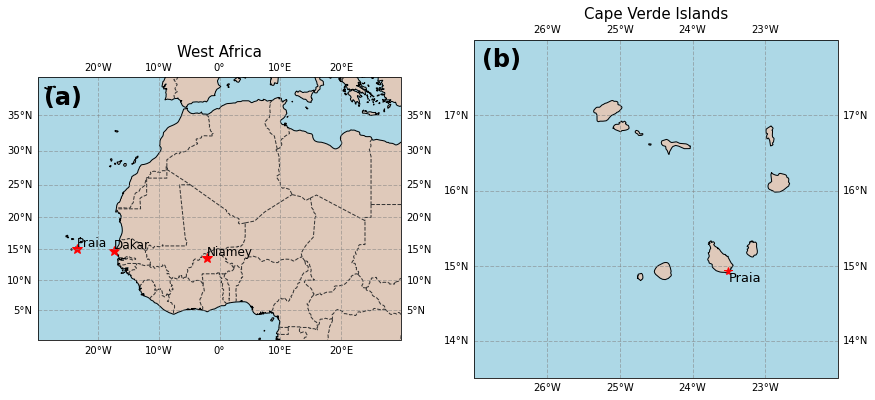

In [2]:
"""
Python code that plots West Africa, and marks the following:

    Niamey, Niger - Dropsonde ID (WMO#): 61052
    Dakar, Senegal - Dropsonde ID(WMO#): 61641
    Praia, Cape Verde Islands - Dropsonde ID (WMO#): 08596
    
Also plots a zoomed-in Cape Islands.
    
"""

fig=plt.figure(figsize=(30,10))

# Set up plots of West Africa 
ax1=fig.add_subplot(141, projection=ccrs.Mercator())
ax1.set_title('West Africa', fontsize=15)
ax1.text(-28.9, 38.9, '(a)', fontsize=24,fontweight='bold',va='top', transform=ccrs.Geodetic())

# Add features (coastlines, land, borders, ocean)
# You can keep this as is or comment them
ax1.coastlines()
ax1.add_feature(cfeature.LAND, color='#dfc9ba')
ax1.add_feature(cfeature.BORDERS, ls='--',edgecolor='0.2')
ax1.add_feature(cfeature.OCEAN, color='lightblue')

#Gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax1.set_extent([30, -30, 0, 40],ccrs.PlateCarree())

# Simple plots for the sites that I looked into for my research
# Plot point for Niamey, Niger (continential site)
ax1.plot(-2.12, 13.51, '*', color='#ff0001', markersize=10, transform=ccrs.Geodetic())
ax1.text(-2.12, 13.51, 'Niamey', fontsize=12, va='bottom', transform=ccrs.Geodetic())

# Plot point for Dakar, Senegal (coastal site)
ax1.plot(-17.46, 14.71, '*', color='#ff0001', markersize=10, transform=ccrs.Geodetic())
ax1.text(-17.46, 14.71, 'Dakar', fontsize=12, va='bottom', transform=ccrs.Geodetic())

# Plot point for Praia, Cape Verde Islands (oceanic site)
ax1.plot(-23.51, 14.93, '*', color='#ff0001', markersize=10, transform=ccrs.Geodetic())
ax1.text(-23.51, 14.93, 'Praia', fontsize=12,va='bottom', transform=ccrs.Geodetic())

#Cape Islands
ax2=fig.add_subplot(142, projection=ccrs.Mercator())
ax2.set_title('Cape Verde Islands', fontsize=15)
ax2.text(-26.9, 17.9, '(b)', fontsize=24, fontweight='bold',va='top', transform=ccrs.Geodetic())

#Features
ax2.coastlines()
ax2.add_feature(cfeature.LAND, color='#dfc9ba')
ax2.add_feature(cfeature.BORDERS, ls='--',edgecolor='0.2')
ax2.add_feature(cfeature.OCEAN, color='lightblue')

#Gridlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax2.set_extent([-27, -22, 13.5, 18],ccrs.PlateCarree())

#Praia, Cape Verde Islands
ax2.plot(-23.51, 14.93, '*', color='#ff0001', markersize=8, transform=ccrs.Geodetic())
ax2.text(-23.51, 14.93, 'Praia', fontsize=13, va='top', transform=ccrs.Geodetic())

---

### Plotting West African monsoon season

To visualize the West African monsoon, I wanted to plot the direction of the wind flow from the northeast trade winds (Harmattan) which blows dry, dusty from the Sahara desert in June to September.

However, I found this article from [Krishnamurti, 2012](https://www.britannica.com/science/West-African-monsoon) that describes the monsoon season in detail and [Adedoyin, 1988](https://link.springer.com/article/10.1007/BF01043455#Abs1) that illustrates a schematic of the trade winds, monsoon front and the interaction of a squall line (SL), AEW (thin lines) and AEJ.

<img src='Westafrica.png' height=800 width=800></img>

In [3]:
#Simple plot of West Africa
#Can uncomment but will just plot West Africa
#I would have plotted northeast wind trade winds during the monsoon season.
#To extend my research (since I'm focused on CAPE values for a oceanic location over a short time range)
#I would find any studies about the AEJ and their influence on squall lines to see if they have any affect on sustainability

#fig=plt.figure(figsize=(7,7))

# Plot of West Africa
#ax1=fig.add_subplot(111, projection=ccrs.Mercator())
#ax1.set_title('West African Monsoon Season in June to September', fontsize=15)

#Features
#ax1.coastlines()
#ax1.add_feature(cfeature.LAND, color='#dfc9ba')
#ax1.add_feature(cfeature.BORDERS, ls='--',edgecolor='0.2')
#ax1.add_feature(cfeature.OCEAN, color='lightblue')

#Gridlines
#gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

#ax1.set_extent([10, -30, 0, 30],ccrs.PlateCarree())
         
#plt.show()
#plt.tight_layout()

### Plotting AEW tracks and AEJ location

Both Nieto et al. (2009) and Cifelli et al. (2010) concluded that the AEW vacilliated between 10 deg N and 20 deg N. Therefore, I retrieved observations from [Fig. 1 in Cifelli et al. (2010)](https://journals.ametsoc.org/view/journals/atsc/67/1/2009jas3141.1.xml?viewAnnotation=177) to illustrate the location of the AEW trough as it propogated offshore on `02 September 2006 to 04 September 2006.`

* Dashed lines indicate the location of the AEW trough on day 1-4. 
* The shaded area indicates where the AEJ vacillated during AMMA.

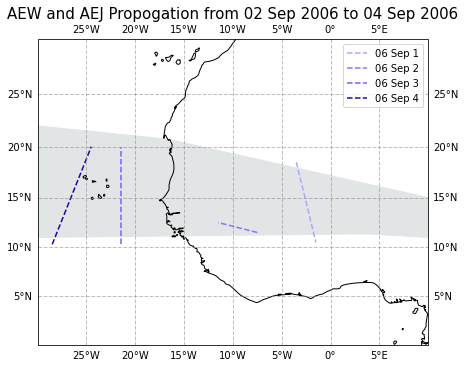

<Figure size 432x288 with 0 Axes>

In [4]:
fig=plt.figure(figsize=(7,7))

# Plot of West Africa
ax1=fig.add_subplot(111, projection=ccrs.Mercator())
ax1.set_title('AEW and AEJ Propogation from 02 Sep 2006 to 04 Sep 2006', fontsize=15)

#Features
#You may add in some features if you like, I kept it the way as is to see the figure better.
ax1.coastlines()
#ax1.add_feature(cfeature.LAND, color='#dfc9ba')
#ax1.add_feature(cfeature.BORDERS, ls='--',edgecolor='0.2')
#ax1.add_feature(cfeature.OCEAN, color='lightblue')

#Gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax1.set_extent([10, -30, 0, 30],ccrs.PlateCarree())

#AEW trough location
#Day 1
ax1.plot([-3.50, -1.50],[18.50, 10.50], color='#b3a3ff', 
         markersize=20, linestyle='--', transform=ccrs.Geodetic())
#Day 2
ax1.plot([-7.50,-11.50],[11.50,12.50], color='#8a72ff', 
         markersize=20, linestyle='--', transform=ccrs.Geodetic())
#Day 3
ax1.plot([-21.50, -21.50],[10.30, 20], color='#7d5cff', 
         markersize=20, linestyle='--', transform=ccrs.Geodetic())
#Day 4
ax1.plot([-28.50, -24.50],[10.30, 20], color='#1d00af', 
         markersize=20, linestyle='--', transform=ccrs.Geodetic())
         
plt.legend(['06 Sep 1', '06 Sep 2', '06 Sep 3', '06 Sep 4'])
         
#AEJ location
ax1.fill([10,-30,-30,10],[15,22,11,11],
         color='#e2e5e5',transform=ccrs.Geodetic())

plt.show()
plt.tight_layout()

---

## Plotting soundings

Finally, 
* Nieto et al. (2009) compared the continental site (Niamey, Niger) as a squall line passed through. The squall line sustained offshore.
* Cifelli et al. (2010) compared continental, coastal and oceanic sites and found that one wave weakened offshore but remained stationary before continuing its progression 48 hours after.

With these results, I decided to plot real-world dropsonde data taken from the AMMA campaign in 2006. Since the data is so extensive, I thought to focus on Cifelli et al. (2010) track in Praia from 
`02 September 2006 to 04 September 2006` and analyze if sounding data changed as a convective system moved off shore.

This part of the coding was the hardest; at first I had decided to create a time series and compare `u_wind, v_wind, and CAPE values` for three to five days during AMMA. Unfortunately I could not make it work, however I do wish to revist this to recreate a time series of the wind components and CAPE/CIN values.

I decided to follow the schematic from Cifelli et al, (2010) that shows the (a) V wind component, (b) U wind component, (c) relative humidity,  and (d) CAPE values over Praia, Cape Verde from `02 September 2006 to 05 September 2006` and the arrow indicates the targeted event in the research article:

<img src='PraiaWFF.jpg' height=800 width=800></img>

In [5]:
# You can keep this uncommented, this code will not do anything but make a dataset and add it to the index,
# This was my initial idea to add in dates for the dataset but I gave up on this and decided to visualize a Skew-T

# define a dictionary 
#datetime=pd.DataFrame({'year': [2006],
#                       'month': [9],
#                       'day': [2]})
#datetime=pd.DataFrame(datetime)
#datetime

#datetime=pd.to_datetime(datetime[['year', 'month', 'day']])
#datetime

Instead with your help, I read in the dataset and focused on only one day at a certain time (02 September 2006, 0334Z) by combining `skiprows` and `nrows`:

In [6]:
"""
 On 02 September 2006, 0334Z
 
  STN     DATE   GMT   HTS     LAT     LONG    ID
GVNP    060902 0334    85    14.93   -23.49  08596
NLVL = 194 COMMENTS:
 
"""
#Read in data from 02 Sep 2006
amma_sep2_0334=pd.read_csv('upaqf_08596', header=None, skiprows=17110, nrows=194, sep='\s+',
                 names=['P','Hgt','Tc','Td', 'DIR', 'SPD', 'QP', 'QH', 'QT', 'QD', 'QW', 'LON', 'LAT'])

amma_sep2_0334

P      Hgt    Tc    Td    DIR   SPD  QP  QH  QT  QD  QW    LON  \
0    1002.0     85.0  26.4  20.6    0.0   0.0   1   1   1   1   1 -23.49   
1    1000.0    102.8  26.1  20.6  360.0   1.2   1   1   1   1   1 -23.49   
2     995.0    147.1  25.9  21.1  360.0   2.0   1   1   1   1   1 -23.49   
3     990.0    191.6  25.8  21.3  359.9   2.3   1   1   1   1   1 -23.49   
4     985.0    236.3  25.6  21.2  359.1   2.2   1   1   1   1   1 -23.49   
..      ...      ...   ...   ...    ...   ...  ..  ..  ..  ..  ..    ...   
189    60.0  19595.9 -65.7 -74.8   90.7  15.0   1   1   1   1   1 -23.95   
190    55.0  20127.3 -61.2 -71.7   88.6  10.3   1   1   1   1   1 -23.97   
191    50.0  20716.7 -61.7 -72.3   84.6   8.3   1   1   1   1   1 -23.97   
192    45.0  21366.0 -60.3 -71.4   87.4  10.3   1   1   1   1   1 -23.98   
193    40.0  22102.0 -58.5 -70.3  105.7   9.9   1   1   1   1   1 -24.01   

       LAT  
0    14.93  
1    14.93  
2    14.93  
3    14.93  
4    14.93  
..     ...  
189  14.92  
190  14.92  
191  14.92  
192  14.91  
193  14.91  

[194 rows x 13 columns]

I added units using the [working with units tutorial from metpy](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html):

In [7]:
#Adding units
p_sep2=amma_sep2_0334['P'].values*units.hPa
T_sep2=amma_sep2_0334['Tc'].values*units.degC
Td_sep2=amma_sep2_0334['Td'].values*units.degC

Using [parcel_profile](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.parcel_profile.html):

In [8]:
#Parcel for 06 Sep 02
parcel_sep2=mpcalc.parcel_profile(p_sep2,T_sep2[0],Td_sep2[0]).to('degC')

And compute the u wind and v wind components from [wind_components](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.wind_components.html):

In [9]:
wdir_sep2=amma_sep2_0334['DIR'].values*units.degrees
wspd_sep2=amma_sep2_0334['SPD'].values*units.knots

In [10]:
u_sep2,v_sep2=mpcalc.wind_components(wspd_sep2.to('m/s'),wdir_sep2) #convert by using .to

We can plot the sounding for `Day 1`. I made a simple Skew-T format to reuse for days 1-3 to save time, I referenced the sounding tutorial from Metpy above, but I just had fun with making this as comprehensible as possible.

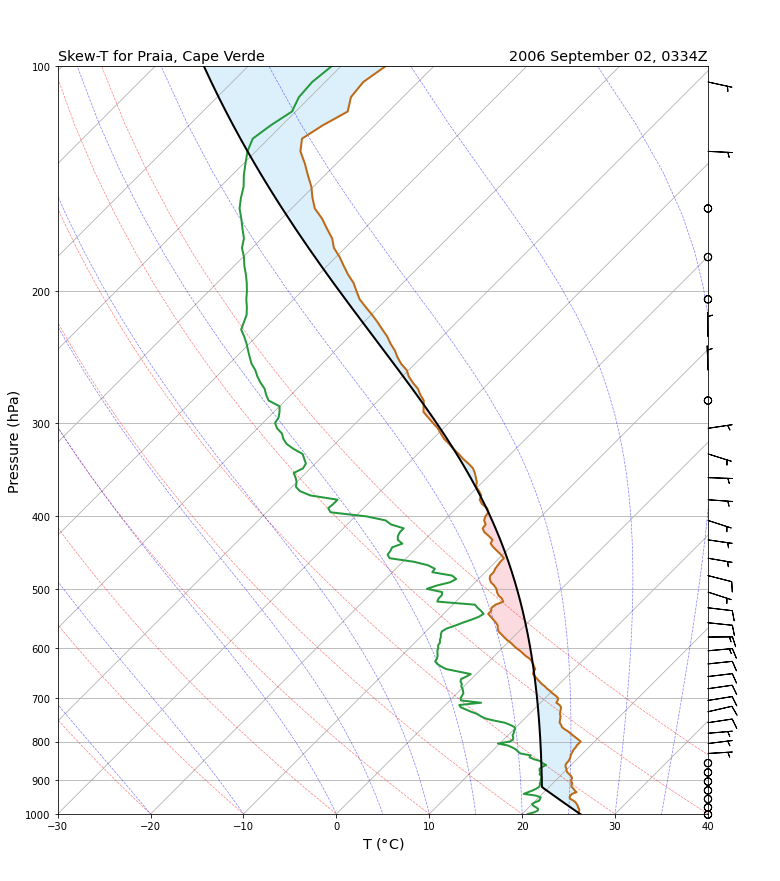

In [11]:
""" Skew T code format for plotting 
"""

fig = plt.figure(figsize=(15, 15))

gs=gridspec.GridSpec(3, 3)
skew=SkewT(fig, rotation=45, subplot=gs[:,:2])

# Plotting the pressure, temperature, dewpoint and parcel path.
skew.plot(p_sep2, T_sep2, color='#bf6917', lw=2)
skew.plot(p_sep2, Td_sep2, color='#26993d', lw=2)
skew.plot(p_sep2, parcel_sep2, color='black', lw=2)

# Wind bards
# To make them prettier, I seperated them as the dataset from AMMA gives wind speed and dir for every 5 mb
skew.plot_barbs(p_sep2[::5], u_sep2[::5], v_sep2[::5])

# Plotting adiabats
skew.plot_dry_adiabats(lw=.7, color='#ea7715')
skew.plot_moist_adiabats(lw=.7)

# Titles and labels
plt.title('Skew-T for Praia, Cape Verde',loc='left', fontsize='x-large')
plt.title('2006 September 02, 0334Z', loc='right', fontsize='x-large') #Valid Time of Forecast
plt.xlabel('T ($\degree$C)', fontsize='x-large')
plt.ylabel('Pressure (hPa)', fontsize='x-large')

# x-axis limits and y-axis limits
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1000, 100)

# CAPE and CIN values, this will be helpful for my research for my final paper in thermo!
skew.shade_cin(p_sep2,T_sep2,parcel_sep2,color='#a7dbf6')
skew.shade_cape(p_sep2,T_sep2,parcel_sep2,color='#f9a6b2')

plt.tight_layout()
plt.show()

There's lots to take in from this sounding alone, but what is notable is the CAPE (area in red) that will change throughout the next two days.

---

I followed the same steps for `Day 2`:

In [12]:
"""
On 03 September 2006, 0334Z
 
 STN     DATE   GMT   HTS     LAT     LONG    ID
GVNP    060903 0337    85    14.93   -23.49  08596
NLVL = 190 COMMENTS:
 
"""
#Read in data from 03 Sep 2006
amma_sep3_0337=pd.read_csv('upaqf_08596', header=None, skiprows=18107, nrows=190, sep='\s+',
                 names=['P','Hgt','Tc','Td', 'DIR', 'SPD', 'QP', 'QH', 'QT', 'QD', 'QW', 'LON', 'LAT'])

amma_sep3_0337

P      Hgt    Tc    Td    DIR   SPD  QP  QH  QT  QD  QW    LON  \
0    1000.5     85.0  27.0  20.7    0.0   0.0   1   1   1   1   1 -23.49   
1    1000.0     89.6  27.0  20.7  314.1   0.3   1   1   1   1   1 -23.49   
2     995.0    134.4  26.7  21.5  313.1   0.8   1   1   1   1   1 -23.49   
3     990.0    179.0  26.5  21.5  312.3   1.2   1   1   1   1   1 -23.49   
4     985.0    223.9  26.4  21.5  312.0   1.3   1   1   1   1   1 -23.49   
..      ...      ...   ...   ...    ...   ...  ..  ..  ..  ..  ..    ...   
185    80.0  17871.6 -74.3 -78.9  134.6  12.2   1   1   1   1   1 -23.65   
186    75.0  18247.8 -74.0 -78.7  121.2   9.8   1   1   1   1   1 -23.65   
187    70.0  18651.0 -72.7 -77.7  102.7  11.6   1   1   1   1   1 -23.66   
188    65.0  19090.4 -68.1 -74.1   99.2  12.2   1   1   1   1   1 -23.67   
189    60.0  19574.3 -64.9 -71.7   89.5   9.0   1   1   1   1   1 -23.68   

       LAT  
0    14.93  
1    14.93  
2    14.93  
3    14.93  
4    14.93  
..     ...  
185  14.90  
186  14.90  
187  14.90  
188  14.91  
189  14.91  

[190 rows x 13 columns]

In [13]:
#Adding units
p_sep3=amma_sep3_0337['P'].values*units.hPa
T_sep3=amma_sep3_0337['Tc'].values*units.degC
Td_sep3=amma_sep3_0337['Td'].values*units.degC

In [14]:
# Checking the units and the data is correct
#p_sep3
#T_sep3
#Tdp_sep3

In [15]:
#Parcel for 06 Sep 03
parcel_sep3=mpcalc.parcel_profile(p_sep3,T_sep3[0],Td_sep3[0]).to('degC')

In [16]:
wdir_sep3=amma_sep3_0337['DIR'].values*units.degrees
wspd_sep3=amma_sep3_0337['SPD'].values*units.knots

In [17]:
u_sep3,v_sep3=mpcalc.wind_components(wspd_sep3.to('m/s'),wdir_sep3) 

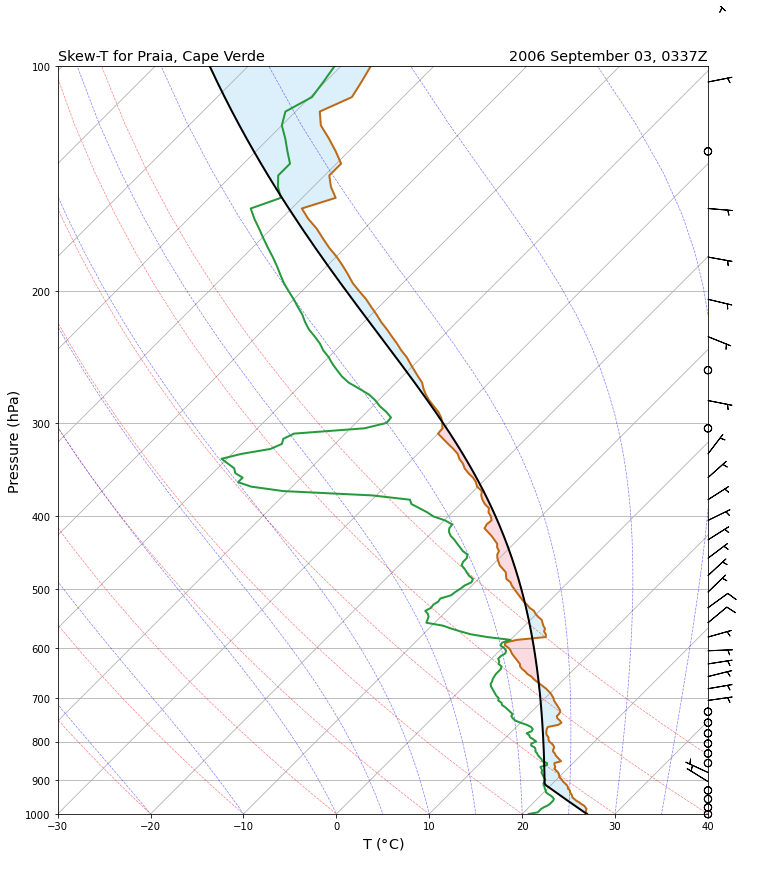

In [18]:
""" Skew T code format for plotting 
"""

fig = plt.figure(figsize=(15, 15))

gs=gridspec.GridSpec(3, 3)
skew=SkewT(fig, rotation=45, subplot=gs[:,:2])

# Plotting the pressure, temperature, dewpoint and parcel path.
skew.plot(p_sep3, T_sep3, color='#bf6917', lw=2)
skew.plot(p_sep3, Td_sep3, color='#26993d', lw=2)
skew.plot(p_sep3, parcel_sep3, color='black', lw=2)

# Wind bards
# To make them prettier, I seperated them as the data plots for every 5 mb
skew.plot_barbs(p_sep3[::5], u_sep3[::5], v_sep3[::5])

# Plotting adiabats
skew.plot_dry_adiabats(lw=.7, color='#ea7715')
skew.plot_moist_adiabats(lw=.7)

# Titles and labels
plt.title('Skew-T for Praia, Cape Verde',loc='left', fontsize='x-large')
plt.title('2006 September 03, 0337Z', loc='right', fontsize='x-large') #Valid Time of Forecast
plt.xlabel('T ($\degree$C)', fontsize='x-large')
plt.ylabel('Pressure (hPa)', fontsize='x-large')

# x-axis limits and y-axis limits
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1000, 100)

# CAPE and CIN values, this will be helpful for my research for my final paper in thermo!
skew.shade_cin(p_sep3,T_sep3,parcel_sep3,color='#a7dbf6')
skew.shade_cape(p_sep3,T_sep3,parcel_sep3,color='#f9a6b2')

plt.tight_layout()
plt.show()

The CAPE values are lower, consistent with the plot from above where the AEW trough was over the oceanic site. In my literature review, the environment was drier as a convective system moved through the city of Praia. However, on day 3, the environment was <b> moist, with southerly flow and high CAPE </b> and Guy et al. 2011 looked at a convective system as it moved to Praia on 04 September 2006.

---

Lastly, the same code was added and altered to plot the sounding on `Day 3` to illustrate if CAPE values change from the last 24 hours:

In [19]:
"""
On 04 September 2006, 0334Z
 
 STN     DATE   GMT   HTS     LAT     LONG    ID
GVNP    060904 0334    85    14.93   -23.49  08596
NLVL = 194 COMMENTS:
 
"""
#Read in data from 04 Sep 2006
amma_sep4_0334=pd.read_csv('upaqf_08596', header=None, skiprows=19290, nrows=194, sep='\s+',
                 names=['P','Hgt','Tc','Td', 'DIR', 'SPD', 'QP', 'QH', 'QT', 'QD', 'QW', 'LON', 'LAT'])

amma_sep4_0334

P      Hgt    Tc    Td    DIR   SPD  QP  QH  QT  QD  QW    LON  \
0    1003.2     85.0  25.9  24.1  168.7   2.0   1   1   1   1   1 -23.49   
1    1000.0    113.3  25.9  23.9  196.1   3.1   1   1   1   1   1 -23.49   
2     995.0    157.7  25.5  23.8  205.4   4.1   1   1   1   1   1 -23.49   
3     990.0    202.2  25.1  23.7  207.6   4.5   1   1   1   1   1 -23.49   
4     985.0    246.9  24.7  23.6  207.7   4.5   1   1   1   1   1 -23.49   
..      ...      ...   ...   ...    ...   ...  ..  ..  ..  ..  ..    ...   
189    60.0  19577.7 -69.2 -76.4  100.4  10.4   1   1   1   1   1 -23.67   
190    55.0  20100.9 -65.3 -73.5   93.0  11.4   1   1   1   1   1 -23.68   
191    50.0  20687.1 -61.7 -70.8   86.9   9.7   1   1   1   1   1 -23.69   
192    45.0  21342.4 -60.0 -69.7   83.0   8.9   1   1   1   1   1 -23.70   
193    40.0  22074.6 -59.4 -69.5   81.8  12.7   1   1   1   1   1 -23.71   

       LAT  
0    14.93  
1    14.93  
2    14.93  
3    14.93  
4    14.93  
..     ...  
189  14.99  
190  14.99  
191  14.99  
192  14.99  
193  14.99  

[194 rows x 13 columns]

In [20]:
#Adding units
p_sep4=amma_sep4_0334['P'].values*units.hPa
T_sep4=amma_sep4_0334['Tc'].values*units.degC
Td_sep4=amma_sep4_0334['Td'].values*units.degC

wdir_sep4=amma_sep4_0334['DIR'].values*units.degrees
wspd_sep4=amma_sep4_0334['SPD'].values*units.knots
# Wind components from metpy
u_sep4,v_sep4=mpcalc.wind_components(wspd_sep4.to('m/s'),wdir_sep4) 

In [21]:
#Parcel for 06 Sep 04
parcel_sep4=mpcalc.parcel_profile(p_sep4,T_sep4[0],Td_sep4[0]).to('degC')

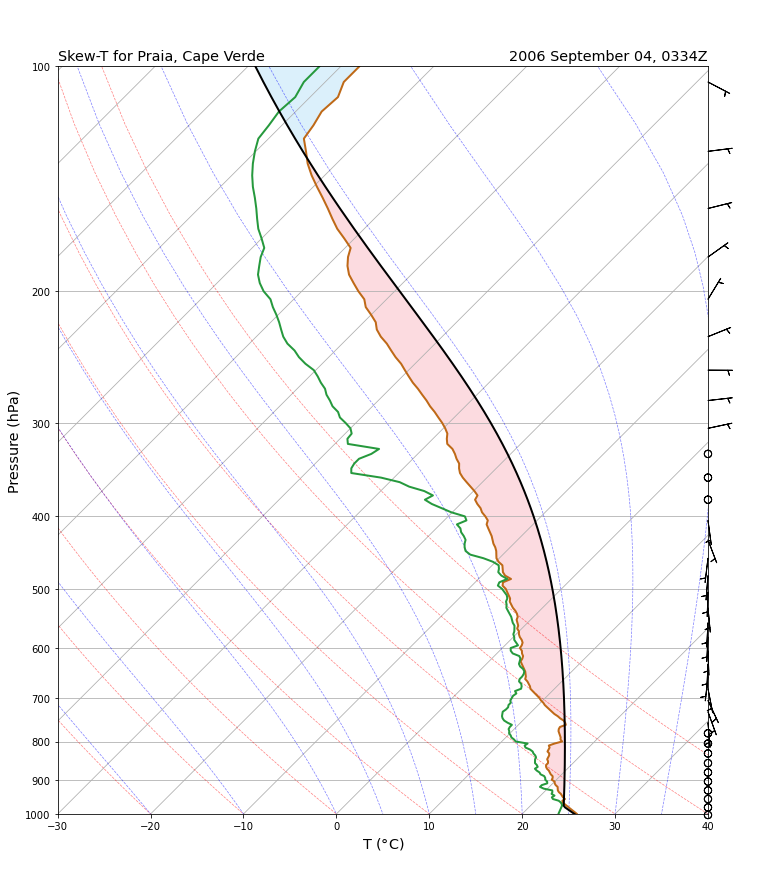

In [22]:
""" Skew T code format for plotting 
"""

fig = plt.figure(figsize=(15, 15))

gs=gridspec.GridSpec(3, 3)
skew=SkewT(fig, rotation=45, subplot=gs[:,:2])

# Plotting the pressure, temperature, dewpoint and parcel path.
skew.plot(p_sep4, T_sep4, color='#bf6917', lw=2)
skew.plot(p_sep4, Td_sep4, color='#26993d', lw=2)
skew.plot(p_sep4, parcel_sep4, color='black', lw=2)

# Wind bards
# To make them prettier, I seperated them as the data plots for every 5 mb
skew.plot_barbs(p_sep4[::5], u_sep4[::5], v_sep4[::5])

# Plotting adiabats
skew.plot_dry_adiabats(lw=.7, color='#ea7715')
skew.plot_moist_adiabats(lw=.7)

# Titles and labels
plt.title('Skew-T for Praia, Cape Verde',loc='left', fontsize='x-large')
plt.title('2006 September 04, 0334Z', loc='right', fontsize='x-large') #Valid Time of Forecast
plt.xlabel('T ($\degree$C)', fontsize='x-large')
plt.ylabel('Pressure (hPa)', fontsize='x-large')

# x-axis limits and y-axis limits
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1000, 100)

# CAPE and CIN values, this will be helpful for my research for my final paper in thermo!
skew.shade_cin(p_sep4,T_sep4,parcel_sep4,color='#a7dbf6')
skew.shade_cape(p_sep4,T_sep4,parcel_sep4,color='#f9a6b2')

plt.tight_layout()
plt.show()

When the AEW trough orientated away from Praia, the CAPE values reached near <b>3000 J/kg</b> (Cifelli et al. 2010), shown by plotting the sounding on 04 September 2006. This is unique since CAPE was concluded to be lower in coastal sites, but high to moderate in continental and oceanic sites respectively. Consistent with the Cifelli et al. (2010) wave event where the system weakened and progessed nearly 48 hours later. We still do not know why this occured or if the system that entered a moist environment on 04 September 2006 sustained offshore, but we can approach this in the next section.

### Conclusion and further research 

What happens next?

* We can always plot several soundings for other cities in West Africa at any particular period during August 2006 to September 2006. 
* Since CAPE values differ in all soundings, we can ask if the location of the AEW trough had any influence on this particular event.
* Investigate sustained events versus weakened events and plot soundings in continental, coastal and oceanic sites.
* Find research studies that describe the 2006 monsoon season in West Africa and plot the region with observational data.

This particular topic is so extensive, but narrowing it down by utilizing observations done in previous field campaigns can approach the question if AEWs influence the sustainability of convective systems as it moves offshore.

Since real-world observations are limited, and numerical modeling/satellite data is shown to be inaccurate, I hope this is a step in the right direction to read in datasets and work with them understand the lifecycle of convective systems and why it sustained its strength over the coast of west Africa. 

---